# Построение графиков

## Основы
В Julia предусмотрены несколько различных путей для построения графиков. <br>

В данном уроке мы познакомимся как использовать модуль `Plots.jl`.  

Вы можете проверить установлен ли модуль `Plots.jl` просто выполнив

In [1]:
using Plots

Если он еще не установлен, вы можете использовать пакетный менеджер для его установки и Julia пре-компилирует его при первой попытке использовать:

In [ ]:
using Pkg
Pkg.add("Plots")
using Plots

Преимущество `Plots.jl` заключается в том, что вы можете плавно имзенить бэкенд. В этом блокноте мы попробуем использовать бэкенды `gr()` и `plotlyjs()`.<br>

С целью развития науки, давайте исследуем зависимость глобальной температуры от количества пиратов в промежутке между 1860 и 2000 годами.

In [2]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17];

Как уже было отмечено, в *Julia* построение графиков осуществимо при помощи нескольких различных бэкендов — библиотек, который в действительности занимаются отрисовкой графиков через одинаковый интерфейс доступа к ним. Чтобы начать, давайте попробуем бэкенд GR. Вы можете выбрать его просто вызвав `gr()`:

In [3]:
gr()

Plots.GRBackend()

после чего можете использовать такие функциии, как `plot` и `scatter` для построения графиков.

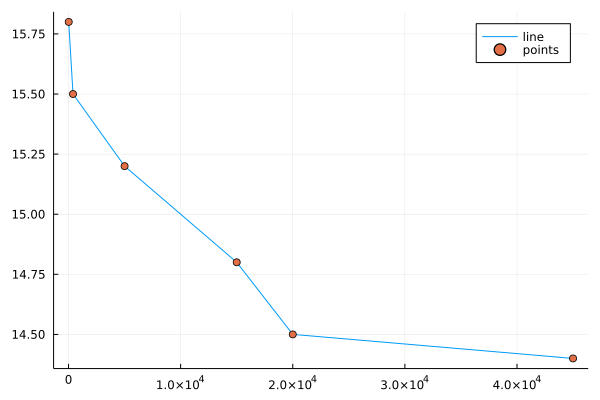

In [8]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 

`!` в названии функции `scatter!` говорит о том, что `scatter!`  - мутирующая функция, что ознаает, что точки новые данные будут добавлены на холст.

Для сравнения, посмотрите что случится, если заменить `scatter!` на немутирующую функцию `scatter`.

Далее, давайте обновим наш холст, добавив к нему подписи осей и заголовок при помощи функций `xlabel!`, `ylabel!`, и `title!`.

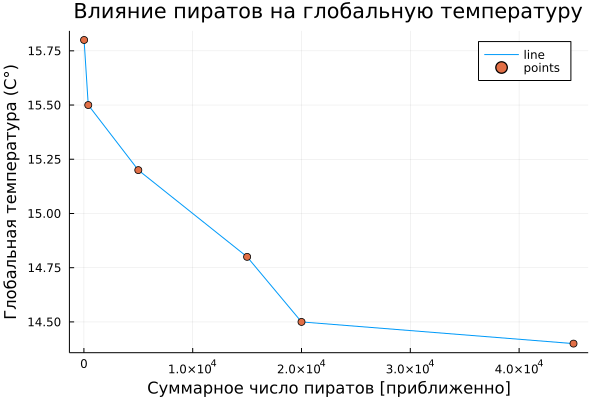

In [12]:
xlabel!("Суммарное число пиратов [приближенно]")
ylabel!("Глобальная температура (C°)")
title!("Влияние пиратов на глобальную температуру")

Однако, он все еще выглядит не очень наглядно. Число пиратов уменьшается с 1860 годов, так что читать график слева направо - словно смотреть назад в прошлое. Поэтому давайте развернем ось Х, что бы было проще увидеть, как численность пиратов влияла на глобальное потепление в течение времени!

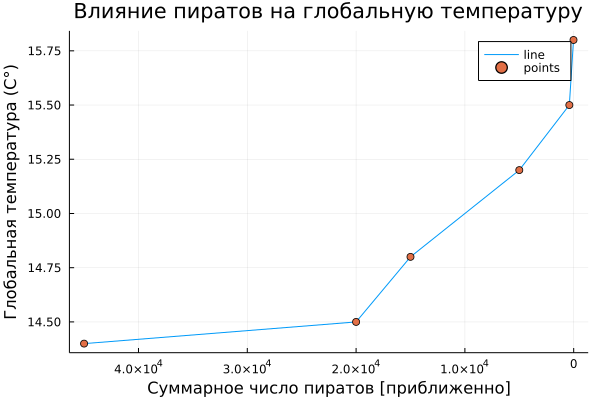

In [13]:
xflip!()

**Теперь, не изменяя кода, мы можем изменить то, как график отрисовывается заменив бэкенд на UnicodePlots**

In [17]:
using Pkg
Pkg.add("PlotlyJS")
plotlyjs()

   Resolving package versions...
  No Changes to `C:\Users\kutsj\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\kutsj\.julia\environments\v1.6\Manifest.toml`


Plots.PlotlyJSBackend()

In [ ]:
Pkg.add("UnicodePlots")
unicodeplots()
using Plots
x = -10:0.1:10
y = sin.(x)
plot(x, y)

In [16]:
plot(numpirates, globaltemperatures, label="line")  
scatter!(numpirates, globaltemperatures, label="points") 
xlabel!("Суммарное число пиратов [приближенно]")
ylabel!("Глобальная температура (C°)")
title!("Влияние пиратов на глобальную температуру")

And notice how this second plot differs from the first!  Using text like this is a little silly in a Jupyter notebook where we have fancy drawing capabilities, but it can be very useful for quick and dirty visualization in a terminal.

### Упражнения

#### 8.1 
Дано
```julia
x = -10:10
```
Постройте график $y = x^2$.  Используйте бэкенд `gr()`.

#### 8.2
Установите бэкенд `plotlyjs()` и постройте график с его помощью

#### 8.3 
Выполните следующий код

In [ ]:
p1 = plot(x, x)
p2 = plot(x, x.^2)
p3 = plot(x, x.^3)
p4 = plot(x, x.^4)
plot(p1, p2, p3, p4, layout = (2, 2), legend = false)

and then create a $4x1$ plot that uses `p1`, `p2`, `p3`, and `p4` as subplots.

In [18]:
? plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr(attr)` function, where `attr` is the symbol `:Series`, `:Subplot`, `:Plot`, or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring, e.g., `plotattr("seriestype")`.
